In [1]:
# https://yt-project.org/
# Import the shiiiii

import yt
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from FLASH_functions import *
sys.path.append('../analysis_scripts')
from real_units_to_sim import get_osiris_units
osiris = get_osiris_units()

# Uncomment when you want to make plots for poster
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['xtick.labelsize'] = 16
# plt.rcParams['ytick.labelsize'] = 16

---------- n_e = 7.8e+18 cm^-3 ----------
angular electron plasma frequency is: 1.58e+14 rad/s
--------------------------------------------------
times are normalized to inverse plasma frequency, one unit of simulation time corresponds to 6.35e-06 ns
space is normalized to electron inertial length, one unit of simulation length corresponds to 1.90e-04 cm
--------------------------------------------------
110000 G in simulation units would be 0.012

electron gyrotime would be 0.0005 ns
this corresponds to 81.438 simulation times

ion gyrotime (with ion mass of 100) would be 0.0517 ns
this corresponds to 8143.756 simulation times
--------------------------------------------------
alfven speed is 3.68e+07 cm/s
in simulation units this would be 0.001228

In order to simulate 5 ion gyrotimes by the time the shock has reached halfway across the box
we should set tmax = 40718
and the maximum bound of the box should be approx 1333
--------------------------------------------------
Te of 1118.0

## First, let's just take a look at some slices of the data

In [2]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

ds = yt.load(plot_path)
list(ds.fields.flash)

yt : [INFO     ] 2024-08-15 13:56:50,737 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-08-15 13:56:50,773 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-08-15 13:56:50,773 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-08-15 13:56:50,774 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-08-15 13:56:50,774 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-08-15 13:56:50,775 Parameters: cosmological_simulation   = 0


[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [3]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
# print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[288 272 288]
2


yt : [INFO     ] 2024-08-15 13:56:52,117 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:52,118 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:52,119 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:52,119 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:52,121 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800


dens at [0.  0.4 0. ] code_length: [2.48007124e-05] code_mass/code_length**3



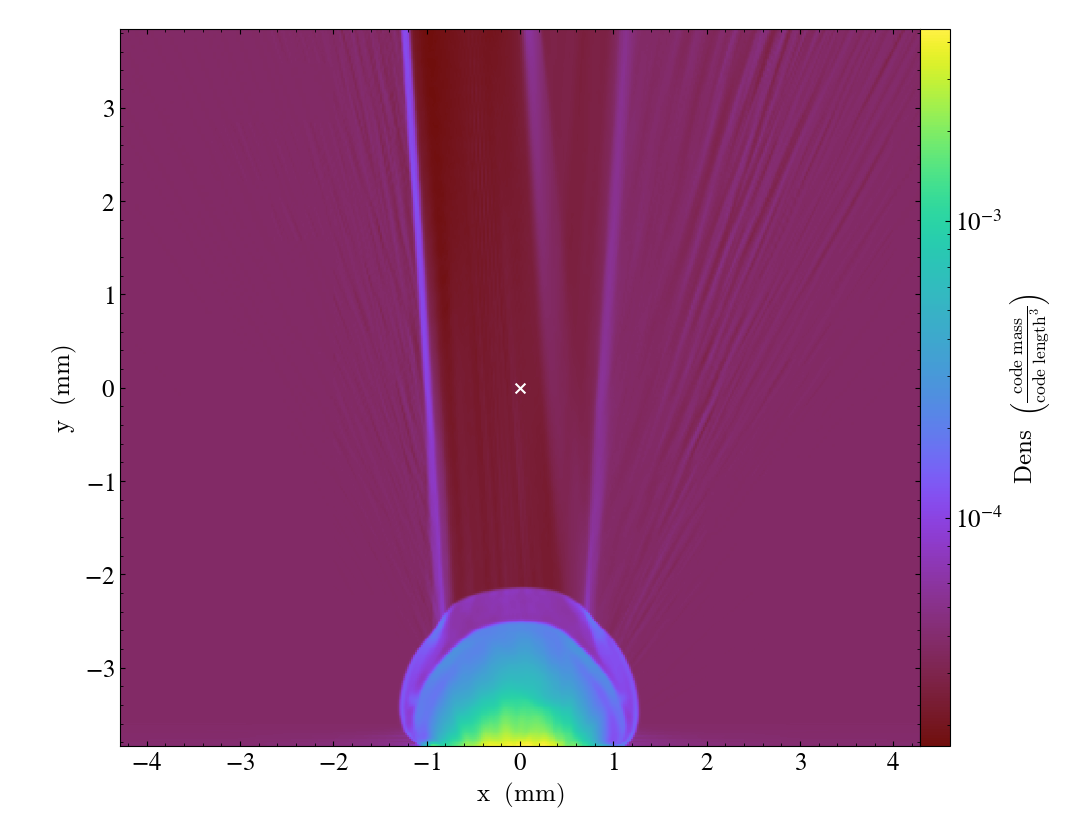

In [4]:
# Find some points in the background to pull values from

# background_pt = [-0.4, 0.3, 0.0]
background_pt = [0, 0.4, 0.0]

rho_0 = pull_value_at_coord(background_pt,'dens',ds)

# looks good

In [5]:
# perform appropriate conversions to get the number density of ions and electrons

def make_ion_number_density(field, data):
    avogadro = 6.022e23
    ion_number_density = avogadro*data["flash","dens"]*data["flash","sumy"]
    return ion_number_density

def make_electron_number_density(field, data):
    avogadro = 6.022e23
    electron_number_density = avogadro*data["flash","dens"]*data["flash","ye"]
    return electron_number_density

ds.add_field(("flash", "idens"), function=make_ion_number_density, units="code_mass/code_length**3",sampling_type="cell") #technically the units are wrong here
ds.add_field(("flash", "edens"), function=make_electron_number_density, units="code_mass/code_length**3",sampling_type="cell") # same here

yt : [INFO     ] 2024-08-15 13:56:52,783 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:52,783 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:52,786 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:52,786 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:52,787 Making a fixed resolution buffer of (('flash', 'edens')) 800 by 800


edens at [0.  0.4 0. ] code_length: [7.19624975e+18] code_mass/code_length**3



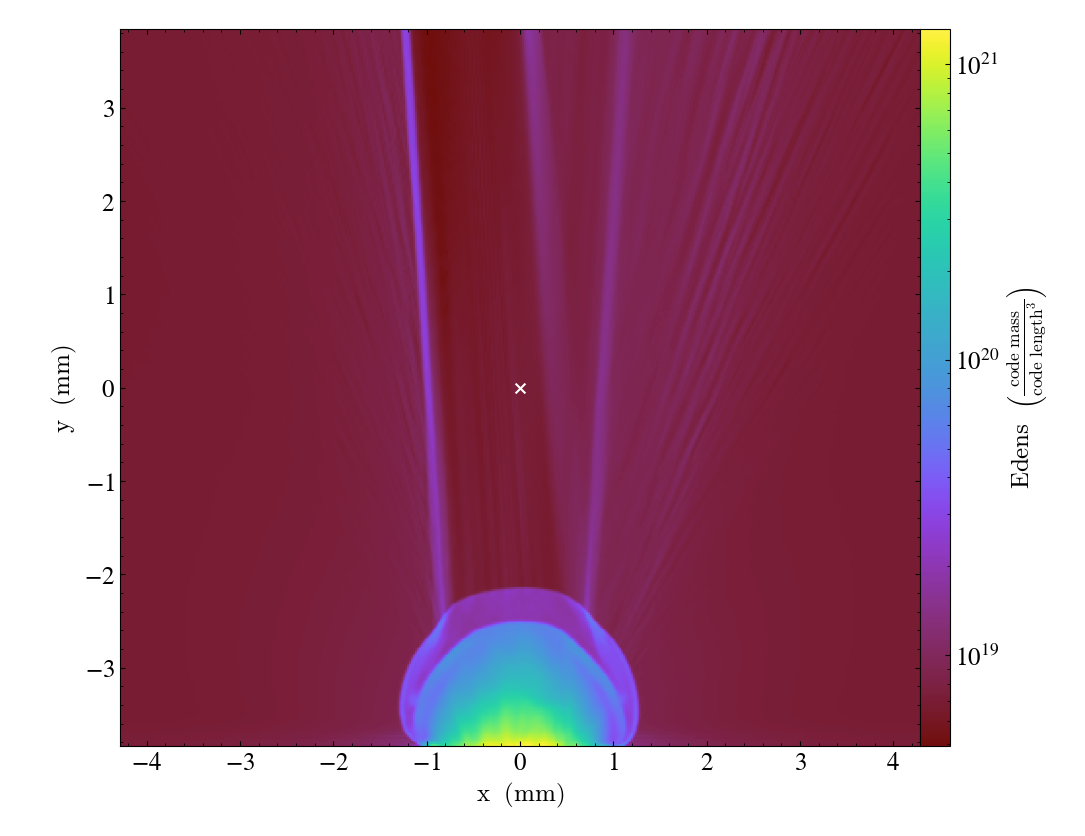

yt : [INFO     ] 2024-08-15 13:56:53,376 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:53,377 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:53,378 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:53,379 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:53,380 Making a fixed resolution buffer of (('flash', 'idens')) 800 by 800


idens at [0.  0.4 0. ] code_length: [5.53557785e+17] code_mass/code_length**3



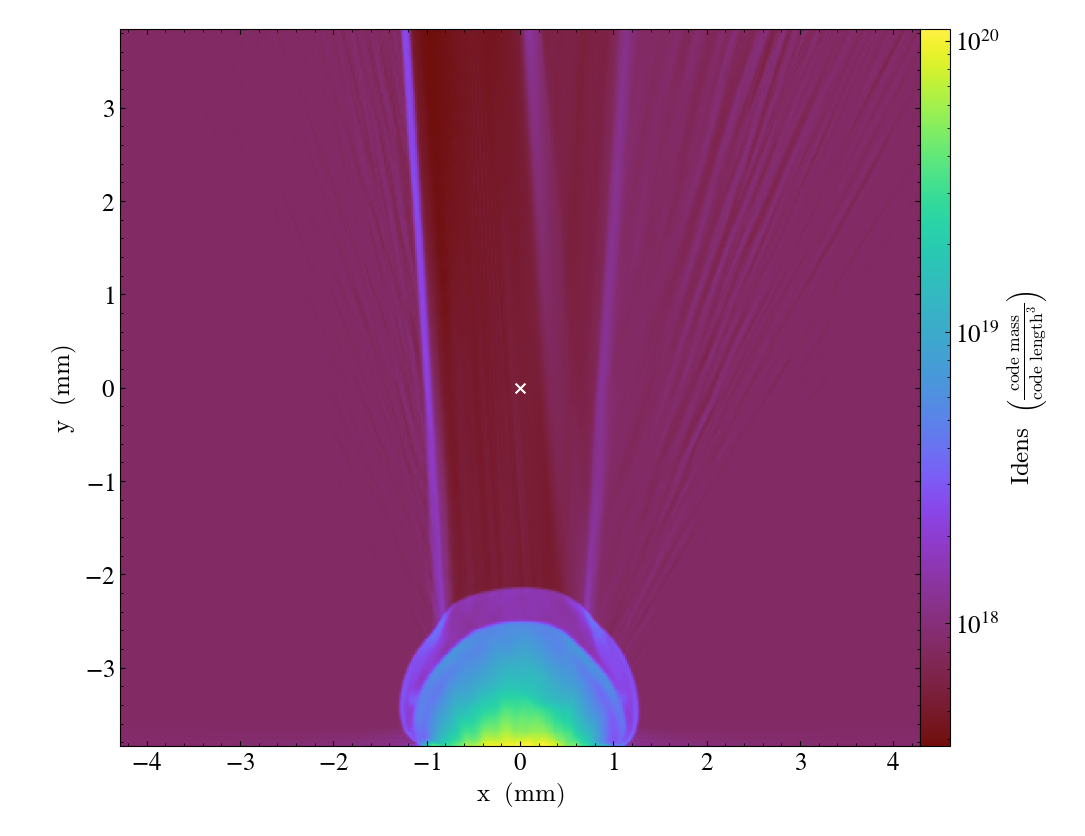

In [6]:
# background_pt = [-0.3, 0.12, 0.0]

ne_0 = pull_value_at_coord(background_pt,'edens',ds)
ni_0 = pull_value_at_coord(background_pt,'idens',ds)


yt : [INFO     ] 2024-08-15 13:56:53,846 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:53,847 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-15 13:56:53,849 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:53,849 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-15 13:56:53,851 Making a fixed resolution buffer of (('flash', 'ye')) 800 by 800



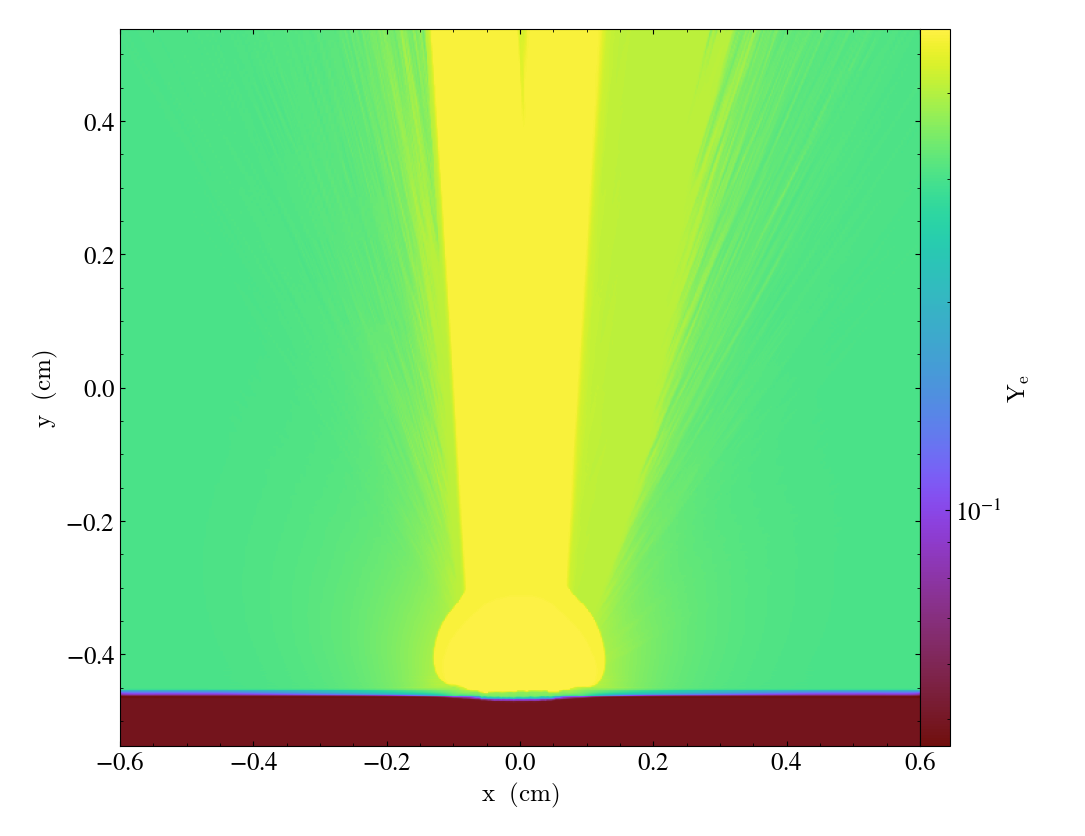

In [7]:
edens = yt.SlicePlot(ds, "z", "ye")
edens


yt : [INFO     ] 2024-08-15 13:56:54,251 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:54,252 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:54,255 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:54,255 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:54,256 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800


magx at [0.  0.4 0. ] code_length: [110226.77212444] code_magnetic



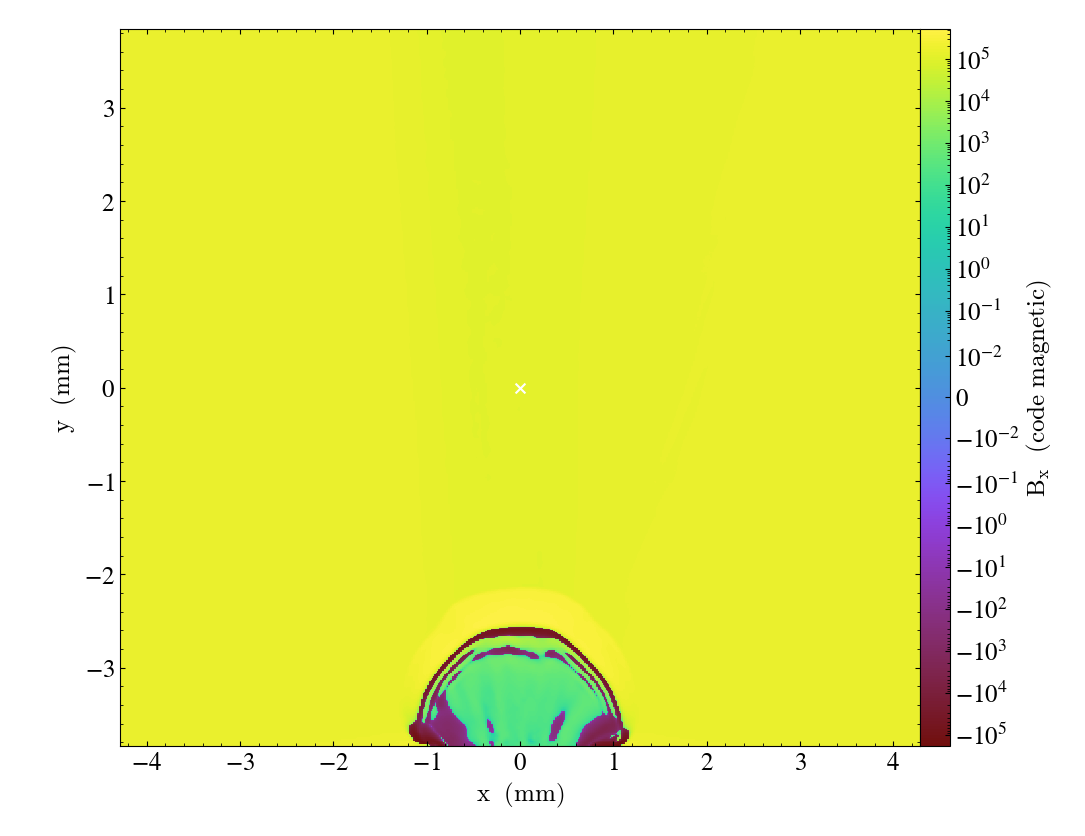

6243815.756688477


In [8]:
Bx_0 = pull_value_at_coord(background_pt,'magx',ds)

v_alfven = Bx_0.value[0]/np.sqrt(4*np.pi*rho_0.value[0])
print(v_alfven)

yt : [INFO     ] 2024-08-15 13:56:55,085 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:55,086 ylim = 0.062500 1.137500
yt : [INFO     ] 2024-08-15 13:56:55,088 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:55,088 ylim = 0.062500 1.137500
yt : [INFO     ] 2024-08-15 13:56:55,089 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800



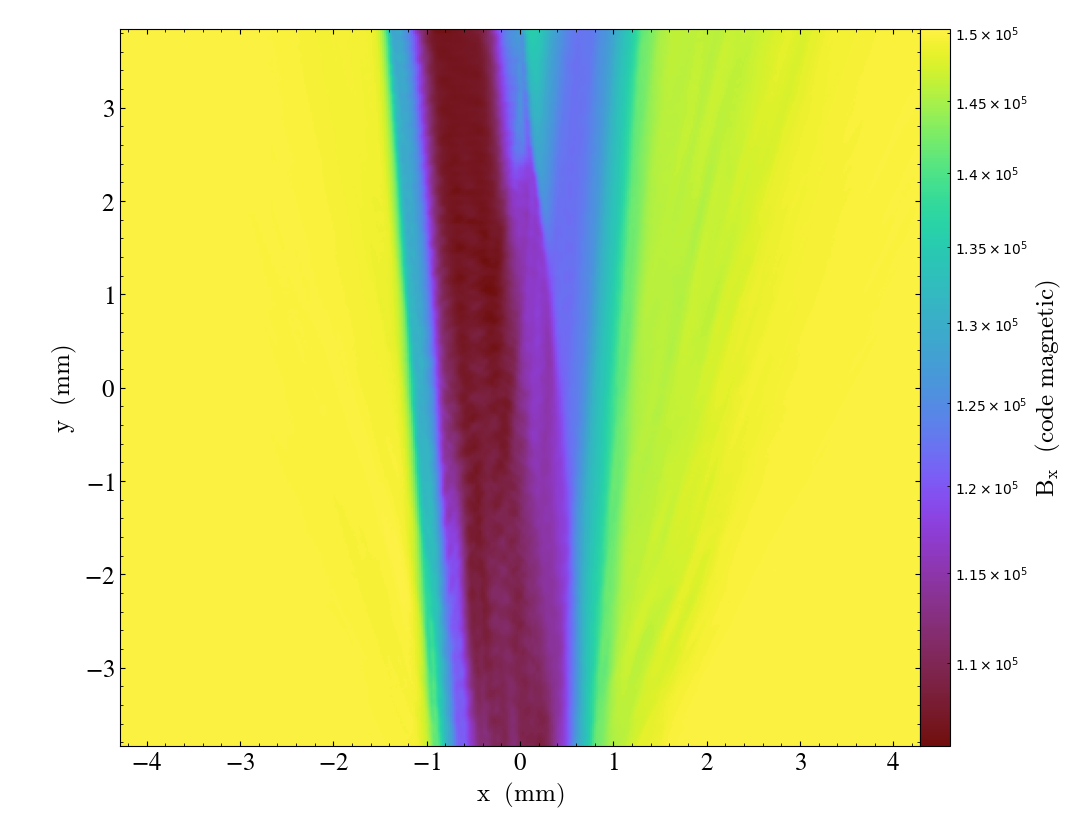

In [9]:
slc = yt.SlicePlot(ds, "z", "magx",center=[0,.6,0]).zoom(1.4)
slc.show()

Text(0, 0.5, 'Number Density [$cm^{-3}$]')

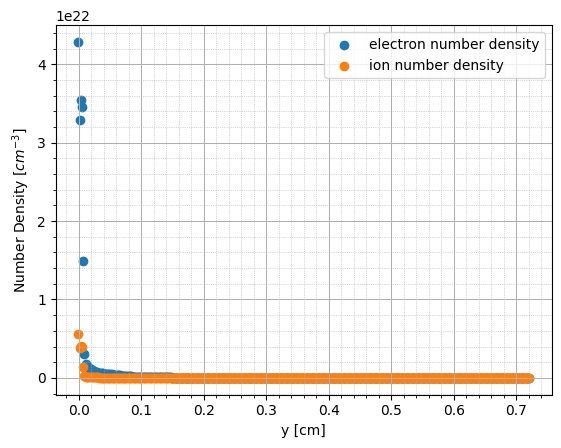

In [10]:
# Take a lineout of the number density to find where the target ends and where the piston begins
ray = ds.ray((0, 0.00, 0), (0, 0.72, 0.0))
y = np.array(ray[('flash','y')])
idens = np.array(ray[('flash','idens')])

edens = np.array(ray[('flash','edens')])
plt.scatter(y, edens, label='electron number density')
plt.scatter(y, idens, label='ion number density')
plt.legend()

from transform import pretty_plot
pretty_plot()


plt.xlabel('y [cm]')
plt.ylabel(r'Number Density [$cm^{-3}$]')
# based on this plot, it looks like the piston begins at y = 0.01

# print(edens[-200])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mach number is between 3.6958108835562618 and 17.17601613513728


Text(0.5, 1.0, 'Velocity distribution of piston')

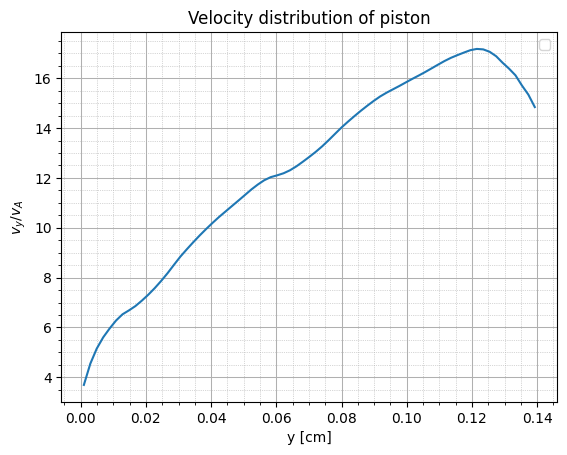

In [11]:
piston_ray = ds.ray((0, 0.01, 0), (0, .15, 0))
vely = np.array(piston_ray[('flash','vely')])
piston = np.array(piston_ray[('flash','y')])-0.01

plt.plot(piston, vely/v_alfven)
pretty_plot()
plt.legend()


mach_number_max = np.max(vely)/v_alfven
mach_number_min = np.min(vely)/v_alfven


print(f"mach number is between {mach_number_min} and {mach_number_max}")

plt.xlabel('y [cm]')
plt.ylabel(r'$v_y/v_A$')

plt.title('Velocity distribution of piston')
# plt.hlines(v_alfven, 0, 0.15, label='Alfven speed')

yt : [INFO     ] 2024-08-15 13:56:56,115 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:56,115 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:56,118 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:56,118 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:56,120 Making a fixed resolution buffer of (('flash', 'tion')) 800 by 800


tion at [0.  0.4 0. ] code_length: [1436956.15327951] code_temperature



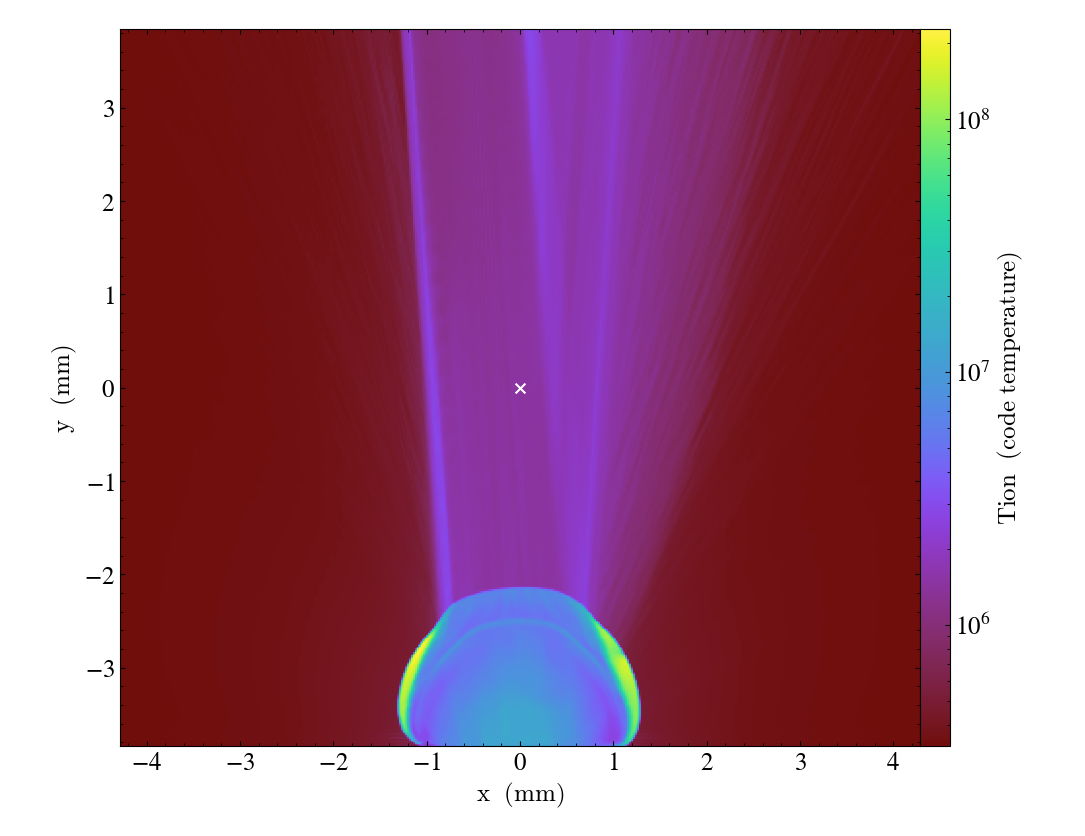

yt : [INFO     ] 2024-08-15 13:56:56,619 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:56,620 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:56,622 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:56,622 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-08-15 13:56:56,624 Making a fixed resolution buffer of (('flash', 'tele')) 800 by 800


tele at [0.  0.4 0. ] code_length: [12974580.64146048] code_temperature



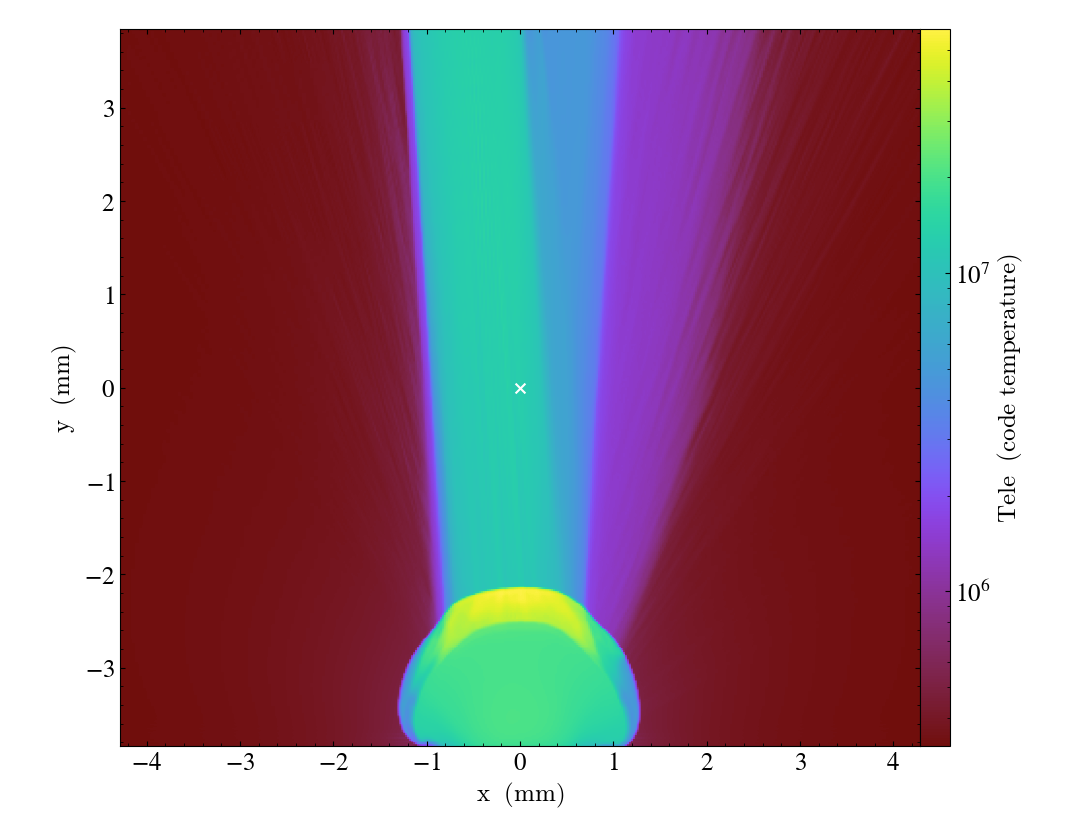

[-0.88924835] dimensionless


In [12]:
Ti_0 = pull_value_at_coord(background_pt,'tion',ds)

Te_0 = pull_value_at_coord(background_pt,'tele',ds)

print((Ti_0 - Te_0)/Te_0) # looks like the temperature difference is around 88%

## Now, start making (throwing) fits!

coefficients for the polynomial fit: [ 2.32986221e-21 -8.35440294e-18  1.24653308e-14 -9.95503587e-12
  4.52642435e-09 -1.12547694e-06  1.17405474e-04  6.17726739e-03
 -2.64892436e+00  2.60665958e+02] 



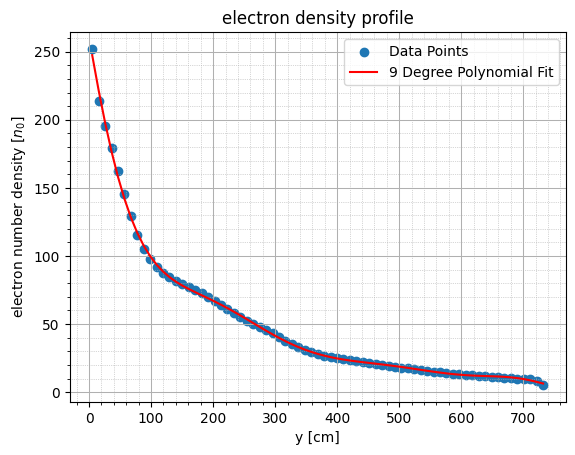

"if(x1 < -125.092, 
(2.329862212746067e-21)*x1^9 + (-8.354402937706974e-18)*x1^8 + (1.2465330755607767e-14)*x1^7 + (-9.955035866878565e-12)*x1^6 + (4.52642434852667e-09)*x1^5 + (-1.1254769430701635e-06)*x1^4 + (1.174054743454898e-04)*x1^3 + (6.17726739308491e-03)*x1^2 + (-2.648924360190084e+00)*x1^1 + (2.606659583624238e+02)*x1^0, 0)",


In [13]:
# Try fitting to a polynomial instead of an exponential

# If you want to fit it to something useful by osiris, you need to first convert your y axis to omega_pe
degree = 9
piston = np.array(piston_ray[('flash','y')])-0.01
piston = piston/osiris['length']
field_ray = np.array(piston_ray[('flash','edens')])/ne_0.value # ask derek about this
coefficients = np.polyfit(piston, field_ray, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, field_ray, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
pretty_plot()

plt.legend()

print(f"coefficients for the polynomial fit: {coefficients} \n")



plt.ylabel('electron number density [$n_0$]')
plt.xlabel('y [cm]')
plt.title('electron density profile')
plt.show()

# Find the x-values where the polynomial fit reaches zero
zero_points = np.roots(coefficients)
real_zero_points = zero_points[np.isreal(zero_points)].real
selected_zero_points = real_zero_points[np.isclose(polynomial_function(real_zero_points), 1)]



print(f"\"if(x1 < {round(real_zero_points[0],3)}, ")
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],None,unique=True)})*x1^"+str(degree-i) + " +"
print(f'{result.strip(" +")}, 0)\",')

coefficients for the polynomial fit: [-6.82711882e-19  1.89628406e-15 -2.04867894e-12  1.03716455e-09
 -1.99751376e-07 -2.74452907e-05  1.89775678e-02 -3.28652659e+00
  2.85931135e+02] 



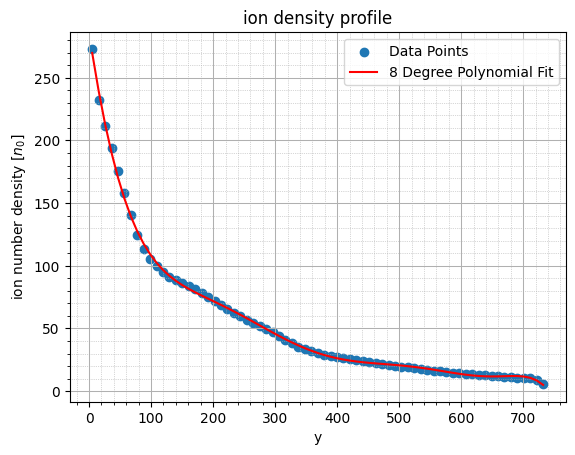

roots at [ 741.17571586 -258.9704686 ]
if(x1 < -258.97,
(-6.8271e-19)*x1^8 + (1.8963e-15)*x1^7 + (-2.0487e-12)*x1^6 + (1.0372e-09)*x1^5 + (-1.9975e-07)*x1^4 + (-2.7445e-05)*x1^3 + (1.8978e-02)*x1^2 + (-3.2865e+00)*x1^1 + (2.8593e+02)*x1^0, 0)


In [14]:
# Try fitting to a polynomial instead of an exponential

# If you want to fit it to something useful by osiris, you need to first convert your y axis to omega_pe
degree = 8

piston = np.array(piston_ray[('flash','y')])-0.01
piston = piston/osiris['length']
field_ray = np.array(piston_ray[('flash','idens')])/ni_0.value # ask derek about this
coefficients = np.polyfit(piston, field_ray, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, field_ray, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
pretty_plot()

plt.legend()

print(f"coefficients for the polynomial fit: {coefficients} \n")



plt.ylabel('ion number density [$n_0$]')
plt.title('ion density profile')
plt.show()

# Find the x-values where the polynomial fit reaches zero
zero_points = np.roots(coefficients)

# Filter out the complex roots and keep only the real roots
real_zero_points = zero_points[np.isreal(zero_points)].real

print(f'roots at {real_zero_points}')

print(f"if(x1 < {round(real_zero_points[1],3)},")
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(f"{result.strip(' +')}, 0)")


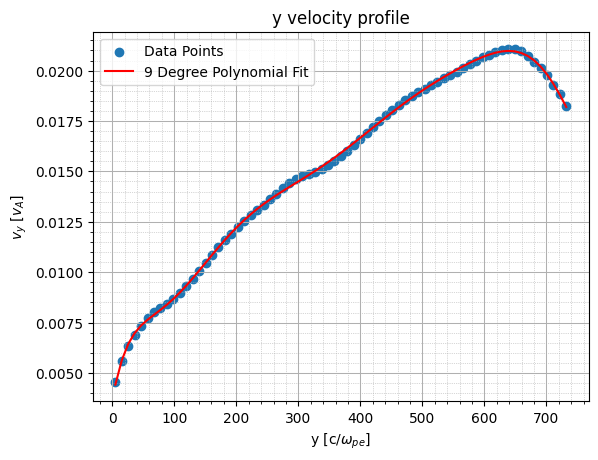

"(3.0561e-25)*x1^9 + (-1.0900e-21)*x1^8 + (1.6388e-18)*x1^7 + (-1.3491e-15)*x1^6 + (6.603e-13)*x1^5 + (-1.9499e-10)*x1^4 + (3.3685e-08)*x1^3 + (-3.1597e-06)*x1^2 + (1.7084e-04)*x1^1 + (3.6384e-03)*x1^0",


In [15]:
degree = 9
vely = np.array(piston_ray[('flash','vely')])/v_alfven*osiris['alfven_speed']
coefficients = np.polyfit(piston, vely, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, vely, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel(r'y [c/$\omega_{pe}$]')
plt.ylabel('$v_y$ [$v_A$]')
pretty_plot()

plt.title('y velocity profile')
plt.legend()
plt.show()

result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print('\"'+result.strip(' +') + '\",')

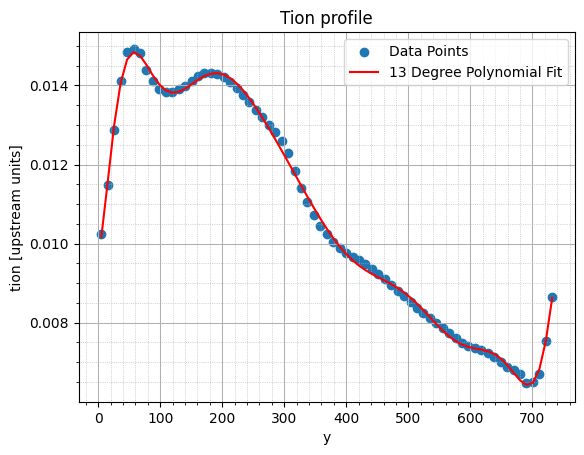

"(-2.6081e-34)*x1^13 + (1.2788e-30)*x1^12 + (-2.7860e-27)*x1^11 + (3.5548e-24)*x1^10 + (-2.9475e-21)*x1^9 + (1.6651e-18)*x1^8 + (-6.5289e-16)*x1^7 + (1.7733e-13)*x1^6 + (-3.2614e-11)*x1^5 + (3.8559e-09)*x1^4 + (-2.6274e-07)*x1^3 + (7.646e-06)*x1^2 + (5.0137e-05)*x1^1 + (9.7479e-03)*x1^0",


In [16]:
tion = np.array(piston_ray[('flash','tion')])/Ti_0.value*osiris['Tpiston']

degree = 13
coefficients = np.polyfit(piston, tion, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, tion, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('tion [upstream units]')
pretty_plot()

plt.title('Tion profile')
plt.legend()
plt.show()

result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print('\"'+result.strip(' +') + '\",')

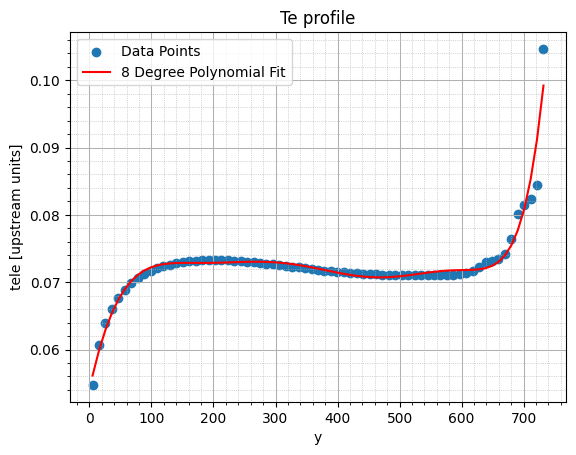

"(1.7932e-22)*x1^8 + (-4.2104e-19)*x1^7 + (3.6937e-16)*x1^6 + (-1.3493e-13)*x1^5 + (4.2109e-12)*x1^4 + (1.1727e-08)*x1^3 + (-3.5675e-06)*x1^2 + (4.2711e-04)*x1^1 + (5.4077e-02)*x1^0",


In [17]:
tele = np.array(piston_ray[('flash','tele')])/Te_0.value*osiris['Te']

degree = 8
coefficients = np.polyfit(piston, tele, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, tele, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('tele [upstream units]')
pretty_plot()

plt.title('Te profile')
plt.legend()
plt.show()

result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print('\"'+result.strip(' +') + '\",')


950.1288647044041


/tmp/ipykernel_179353/456478212.py:8: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(y_norm, magx, degree)


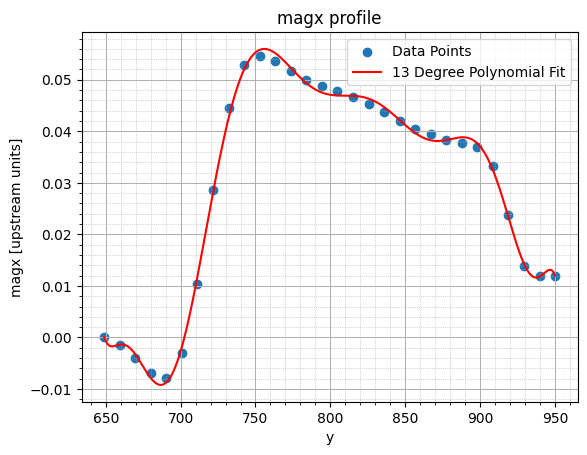

"if(x1 < 648.95, 0, if(x1 < 950.13, 
(-6.204660768352635e+08)*(x1/648.95)^13 + (4.679000036459196e+09)*(x1/648.95)^12 + (-1.4773065969562471e+10)*(x1/648.95)^11 + (2.4019924814368263e+10)*(x1/648.95)^10 + (-1.756959923211496e+10)*(x1/648.95)^9 + (-4.2791375046703725e+09)*(x1/648.95)^8 + (1.8059767981903427e+10)*(x1/648.95)^7 + (-8.514021701893761e+09)*(x1/648.95)^6 + (-9.867867036114187e+09)*(x1/648.95)^5 + (1.672237469961025e+10)*(x1/648.95)^4 + (-1.1306051516017979e+10)*(x1/648.95)^3 + (4.243560217932123e+09)*(x1/648.95)^2 + (-8.713459591425171e+08)*(x1/648.95)^1 + (7.692724609023724e+07)*(x1/648.95)^0, 0.012))",


In [18]:
degree = 13
start_pt = (0.0,0.133,0.0); end_pt = (0,0.19,0)
ray = ds.ray(start_pt, end_pt)

y = (np.array(ray['flash','y'])-0.01)/osiris['length']
y_norm = y/round(y[-1],2)
magx = (np.array(ray[('flash','magx')]))/Bx_0.value*osiris['B']
coefficients = np.polyfit(y_norm, magx, degree)

print()
# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_smooth = np.linspace(y_norm[0],y_norm[-1],1000)
y_fit = polynomial_function(y_smooth)

# Plot the original data points
plt.scatter(y, magx, label='Data Points')
print(y[-1])
# Plot the polynomial fit
plt.plot(y_smooth*y[-1], y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('magx [upstream units]')
pretty_plot()

plt.title('magx profile')
plt.legend()
plt.show()


print(f"\"if(x1 < {round(y[0],2)}, 0, if(x1 < {round(y[-1],2)}, ")
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],None,unique=True)})*(x1/{round(y[0],2)})^"+str(degree-i) + " +"
print(result.strip(' +')+f", {osiris['B']}))\",")

/tmp/ipykernel_179353/4091714884.py:5: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(y, magz, degree)


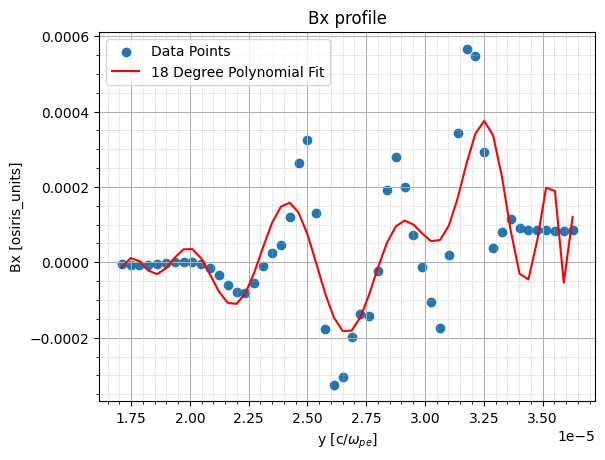

(8.1531e+86)*x1^18 + (-2.0757e+83)*x1^17 + (2.1348e+79)*x1^16 + (-1.0363e+75)*x1^15 + (1.4213e+70)*x1^14 + (7.9688e+65)*x1^13 + (-2.7744e+61)*x1^12 + (-5.9752e+56)*x1^11 + (3.8328e+52)*x1^10 + (2.9378e+47)*x1^9 + (-4.9655e+43)*x1^8 + (5.2880e+38)*x1^7 + (4.7059e+34)*x1^6 + (-2.2454e+30)*x1^5 + (5.018e+25)*x1^4 + (-6.7448e+20)*x1^3 + (5.5971e+15)*x1^2 + (-2.6633e+10)*x1^1 + (5.5933e+04)*x1^0


In [19]:
degree = 18
ray = ds.ray((0, 0.10, 0), (0, .20, 0))
y = (np.array(ray['flash','y'])-0.01)*osiris['length']
magz = np.array(ray[('flash','magz')])/Bx_0.value*osiris["B"]
coefficients = np.polyfit(y, magz, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(y)

# Plot the original data points
plt.scatter(y, magz, label='Data Points')

# Plot the polynomial fit
plt.plot(y, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel(r'y [c/$\omega_{pe}$]')
plt.ylabel('Bx [osiris_units]')
pretty_plot()

plt.title('Bx profile')
plt.legend()
plt.show()


result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))

In [20]:
def make_Ex(field, data):
    Ex = data['flash','velz']*data["flash","magy"]-data["flash","vely"]*data["flash","magz"]
    return Ex

def make_Ey(field, data):
    Ey = data['flash','velx']*data["flash","magz"]-data["flash","velz"]*data["flash","magx"]
    return Ey

def make_Ez(field, data):
    Ez = data['flash','vely']*data["flash","magx"]-data["flash","velx"]*data["flash","magy"]
    return Ez

ds.add_field(("flash", "Ex"), function=make_Ex, units="code_magnetic*code_length/code_time",sampling_type="cell") #technically the units are wrong here
ds.add_field(("flash", "Ey"), function=make_Ey, units="code_magnetic*code_length/code_time",sampling_type="cell")
ds.add_field(("flash", "Ez"), function=make_Ez, units="code_magnetic*code_length/code_time",sampling_type="cell")

yt : [INFO     ] 2024-08-15 13:56:58,357 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:58,358 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-15 13:56:58,360 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-15 13:56:58,360 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-15 13:56:58,361 Making a fixed resolution buffer of (('flash', 'Ez')) 800 by 800



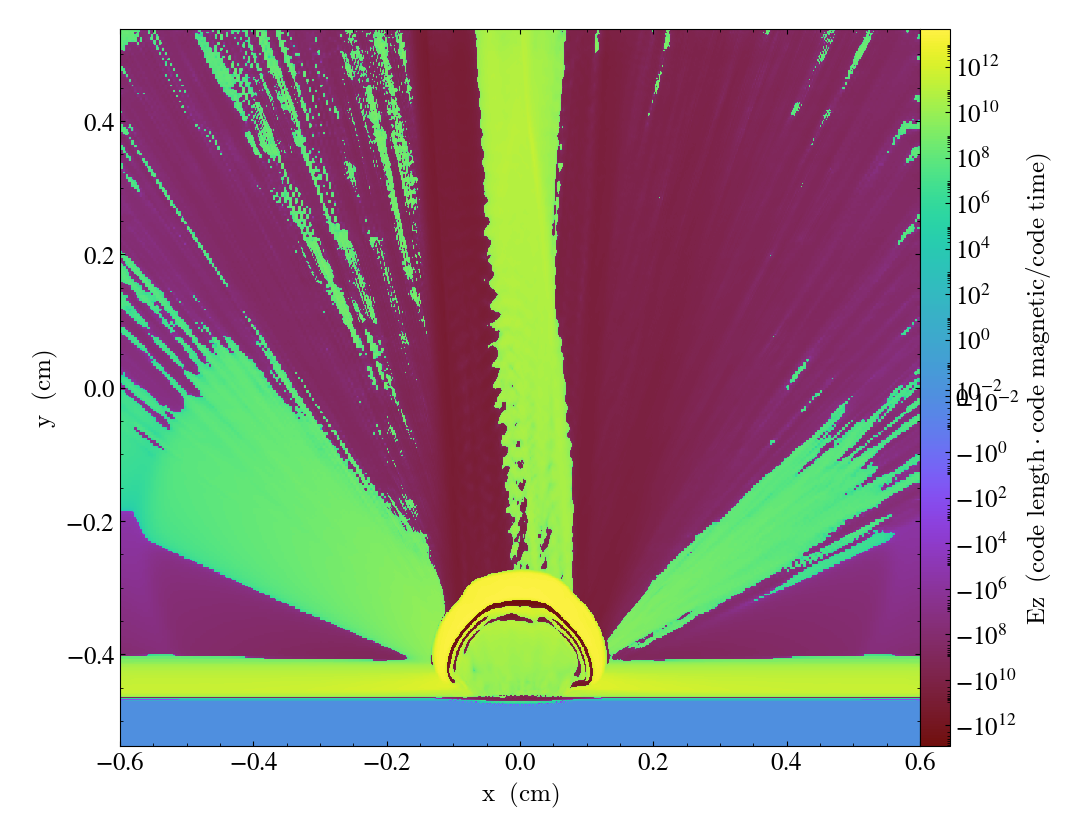

In [21]:
yt.SlicePlot(ds, 'z', ('flash', 'Ez')).show()


/tmp/ipykernel_179353/3732820592.py:8: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(y_norm, Ez, degree)


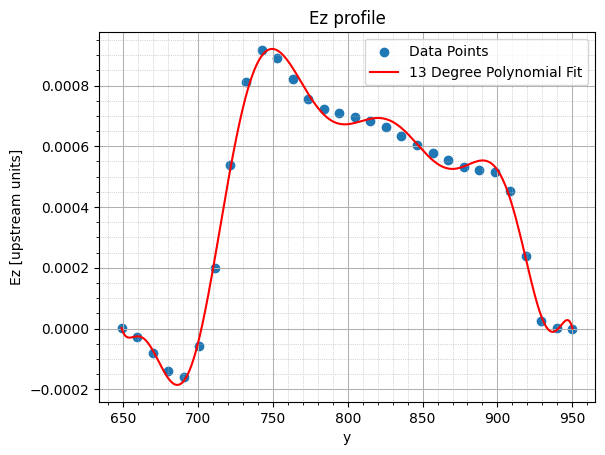

"if(x1 < 648.95, 0, if(x1 < 950.13, 
(-9.411260494295407e+04)*(x1/648.95)^13 + (1.037661267908527e+06)*(x1/648.95)^12 + (-4.789593440232288e+06)*(x1/648.95)^11 + (1.138217179404163e+07)*(x1/648.95)^10 + (-1.2157553936237626e+07)*(x1/648.95)^9 + (-4.378125466057655e+06)*(x1/648.95)^8 + (2.678897013412474e+07)*(x1/648.95)^7 + (-1.8391685561305653e+07)*(x1/648.95)^6 + (-3.1423331636538666e+07)*(x1/648.95)^5 + (7.765762107264382e+07)*(x1/648.95)^4 + (-7.671488011151224e+07)*(x1/648.95)^3 + (4.208364476412075e+07)*(x1/648.95)^2 + (-1.2630825176810721e+07)*(x1/648.95)^1 + (1.6300389007999268e+06)*(x1/648.95)^0, 0.0))",


In [22]:
degree = 13
start_pt = (0.0,0.133,0.0); end_pt = (0,0.19,0)
ray = ds.ray(start_pt, end_pt)

y = (np.array(ray['flash','y'])-0.01)/osiris['length']
y_norm = y/round(y[0],2)
Ez = (np.array(ray[('flash','Ez')]))/Bx_0.value*osiris['B']/v_alfven*osiris['alfven_speed']
coefficients = np.polyfit(y_norm, Ez, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_smooth = np.linspace(y_norm[0],y_norm[-1],1000)
y_fit = polynomial_function(y_smooth)

# Plot the original data points
plt.scatter(y, Ez, label='Data Points')

# Plot the polynomial fit
plt.plot(y_smooth*y[0], y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('Ez [upstream units]')
pretty_plot()

plt.title('Ez profile')
plt.legend()
plt.show()


print(f"\"if(x1 < {round(y[0],2)}, 0, if(x1 < {round(y[-1],2)}, ")
result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],None,unique=True)})*(x1/{round(y[0],2)})^"+str(degree-i) + " +"
print(result.strip(' +')+f", {round(osiris['B']*osiris['alfven_speed'],2)}))\",")

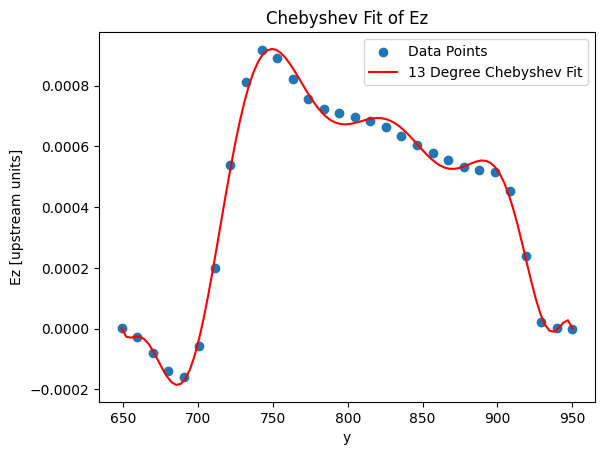

In [ ]:
from numpy.polynomial import chebyshev

# Define the degree of the Chebyshev polynomial fit
degree = 13

# Fit the data to Chebyshev polynomials
coefficients = chebyshev.chebfit(y, Ez, degree)

# Generate x values for plotting
x = np.linspace(y[0], y[-1], 100)

# Evaluate the Chebyshev polynomial fit at the x values
fit = chebyshev.chebval(x, coefficients)

# Plot the original data points
plt.scatter(y, Ez, label='Data Points')

# Plot the Chebyshev polynomial fit
plt.plot(x, fit, color='red', label=f'{degree} Degree Chebyshev Fit')

plt.xlabel('y')
plt.ylabel('Ez [upstream units]')
plt.title('Chebyshev Fit of Ez')
plt.legend()
plt.show()

In [23]:
chebyshev.cheb2poly

NameError: name 'chebyshev' is not defined

/tmp/ipykernel_19493/2840591338.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(y, magx, degrees[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_19493/2840591338.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(y, magx, degrees[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_19493/2840591338.py:10: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(y, magx, degrees[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when lege

"if(x1 < 628.178185568948, 0, if(x1 < 700.8767260188898, 
"if(x1 < 700.8767260188898, 0, if(x1 < 742.4187491331421, 
"if(x1 < 742.4187491331421, 0, if(x1 < 898.2013358115886, 
"if(x1 < 898.2013358115886, 0, if(x1 < 1002.0563935972195, 


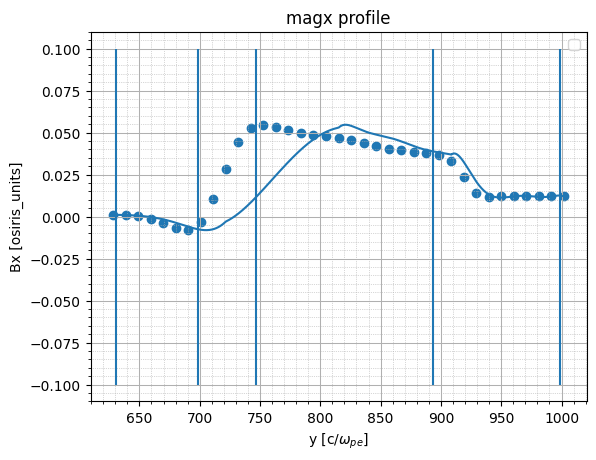

In [ ]:
degrees = [8,8,8,8]
pts = [(0, 0.13, 0), (0, 0.143, 0), (0, 0.152, 0),(0, 0.18,0), (0, 0.20, 0)]
sols = []
for i in range(len(pts)-1):
    start_pt = pts[i]; end_pt = pts[i+1]
    ray = ds.ray(start_pt, end_pt)

    y = (np.array(ray['flash','y'])-0.01)/osiris['length']
    magx = (np.array(ray[('flash','magx')]))/Bx_0.value*osiris['B']
    coefficients = np.polyfit(y, magx, degrees[i])

    # coefficients[0:1] = 0

    # Create a polynomial function from the coefficients
    polynomial_function = np.poly1d(coefficients)

    # (Optional) Plotting

    # Calculate y values for the plotting range using the polynomial function
    y_smooth = np.linspace(y[0], y[-1], 2000)
    y_fit = polynomial_function(y_smooth)
    

    # Plot the polynomial fit
    sols.extend(y_fit)
    

    plt.xlabel(r'y [c/$\omega_{pe}$]')
    plt.ylabel(f'Bx [osiris_units]')
    # pretty_plot()

    plt.title(f'magx profile')
    plt.legend()
    # plt.show()

    print(f"\"if(x1 < {y[0]}, 0, if(x1 < {y[-1]}, ")
    result = ''
    # for i in range(len(coefficients)):
    #     result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
    # print(result.strip(' +')+f", {osiris['B']}))\",")

start_pt = pts[0]; end_pt = pts[-1]
ray = ds.ray(start_pt, end_pt)

y = (np.array(ray['flash','y'])-0.01)/osiris['length']
magx = (np.array(ray['flash','magx']))/Bx_0*osiris['B']

y_smooth = np.linspace(y[0], y[-1], 8000)
plt.scatter(y, magx, label='Data Points')

plt.plot(y_smooth, sols, label=f'{degrees[1]} Degree Polynomial Fit')

for i in range(len(pts)):
    plt.vlines((pts[i][1]-0.01)/osiris['length'],ymin=-.1,ymax = .1)
pretty_plot()